In [12]:
import sys
import numpy as np
import pandas as pd
import cv2
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

from os import listdir 
from os.path import isfile, join
from tifffile import imread, imsave
from glob import glob

np.random.seed(42)


import logging
logger = logging.getLogger()  # Logger

logger.setLevel("INFO")
#logging.info("Hello")

In [2]:
def write_pickle(path, obj):
    with open(path, "wb") as f:
        pickle.dump(obj, f)
        
def read_pickle(path):
    with open(path, "rb") as f:
        obj = pickle.load(f)
    return obj

In [3]:
masks_dic = read_pickle(path="/mnt/DataRAID/melismail/Preprocessing/data/pickle_data/Preprocessing/filtered_mask_dict.pkl")
df_combined_incept = read_pickle('/mnt/DataRAID/melismail/Preprocessing/data/pickle_data/SVM/df_combined_incept.pkl')

In [4]:
tumor_mask = {key for (key,value) in masks_dic.items() if len(np.where(value == 1)[0]) > 0}

In [5]:
df_masks = pd.DataFrame(tumor_mask)

In [7]:
df_masks.columns = ['Mask', 'tile']

In [8]:
df_masks['Img'] = df_masks['Mask'] + "_" + df_masks['tile'].astype(str)
df_masks = df_masks.drop(['Mask', 'tile'], axis=1)
df_masks['lbl_mask'] = "cancer"

In [11]:
print(df_masks.head())

             Img     lbl
0  IAA2LDX17_338  cancer
1  IEV81RDT6_652  cancer
2  18QH2FGR4_585  cancer
3  1U76LU6J5_431  cancer
4   1C73PUTH4_87  cancer


In [17]:
df_features["Img"]

0         (18QH2FGR4, 0)
1         (18QH2FGR4, 1)
2         (18QH2FGR4, 2)
3         (18QH2FGR4, 3)
4         (18QH2FGR4, 4)
              ...       
6056    (ILH0VMVF5, 831)
6057    (ILH0VMVF5, 832)
6058    (ILH0VMVF5, 833)
6059    (ILH0VMVF5, 834)
6060    (ILH0VMVF5, 835)
Name: Img, Length: 6061, dtype: object

In [10]:
df_combined_incept_tumor = df_masks.merge(df_combined_incept, on='Img', how="right").fillna("non-cancer")
print(df_combined_incept_tumor.head())

             Img    lbl_mask         lbl  \
0  18QH2FGR4_270  non-cancer  non-cancer   
1  18QH2FGR4_324  non-cancer  non-cancer   
2  18QH2FGR4_322  non-cancer  non-cancer   
3  18QH2FGR4_397  non-cancer  non-cancer   
4  18QH2FGR4_436  non-cancer  non-cancer   

                                            Features  
0  [0.17763883, 0.14930727, 0.099433355, 0.046645...  
1  [0.2863244, 0.029040584, 0.13237323, 0.0353634...  
2  [0.25656575, 0.19232213, 0.34882596, 0.2506054...  
3  [0.07404756, 0.05178327, 0.018168312, 0.131144...  
4  [0.10449956, 0.085279934, 0.0015779797, 0.0874...  


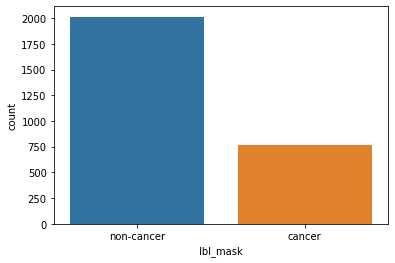

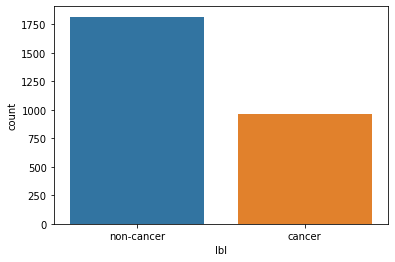

In [11]:
sns.countplot(data=df_combined_incept_tumor, x="lbl_mask")
plt.show()
sns.countplot(data=df_combined_incept_tumor, x="lbl")
plt.show()

In [13]:
df_combined_incept_tumor["same"] = df_combined_incept_tumor["lbl_mask"] == df_combined_incept_tumor["lbl"]
df_combined_incept_tumor[~df_combined_incept_tumor["same"]].shape[0]

1093

In [14]:
write_pickle(path='/mnt/DataRAID/melismail/Preprocessing/Label_process_patho/df_combined_incept_bothlbl.pkl', obj=df_combined_incept_tumor)